In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 第八週:作業二

# Beijing PM2.5 Data Data Set

In [144]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31')

In [147]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


### 看風速對pm2.5的影響

In [148]:
df1=df[["Iws","pm2.5"]].tail(43800)

In [150]:
df1.head()

,Iws,pm2.5
24,1.79,129.0
25,2.68,148.0
26,3.57,159.0
27,5.36,181.0
28,6.25,138.0


In [151]:
wind_speed=np.array(df1["Iws"])
pm25=np.array(df1["pm2.5"])

In [152]:
pm25[np.isnan(pm25)]=0

In [153]:
from sklearn.linear_model import LinearRegression

In [154]:
regr=LinearRegression()

In [155]:
pm25=pm25.reshape(43800,1)

In [156]:
wind_speed=wind_speed.reshape(43800,1)

In [157]:
regr.fit(wind_speed,pm25)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'pm25')

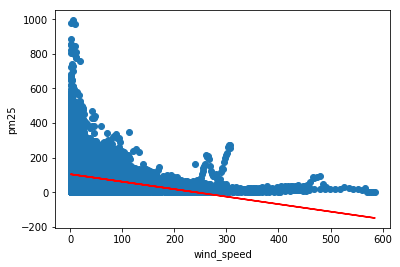

In [158]:
plt.scatter(wind_speed,pm25)
plt.plot(wind_speed,regr.predict(wind_speed),'r')
plt.xlabel("wind_speed")
plt.ylabel("pm25")

### 整體看起來風速越大、pm2.5越少(可能懸浮微粒會被吹走之類的)，而且從無風開始到風速剛加大時的效果最好。

### 中間有一些凸出來的資料點比較不一樣。